Length of y: 100
Values of β0 and β1 in the model: β0 = -1, β1 = 0.5


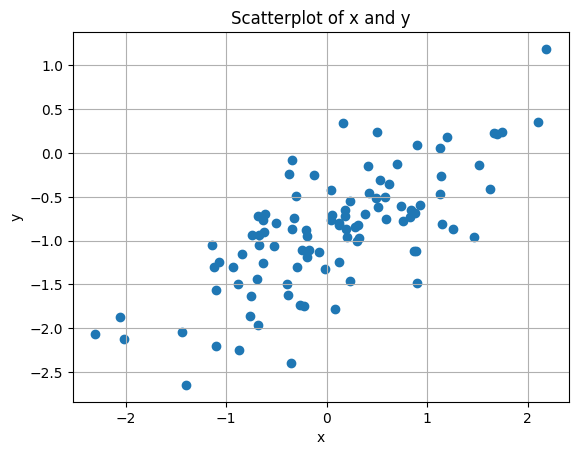

Fitted model: Intercept = -0.926493235150899, Slope = 0.5477135668255857


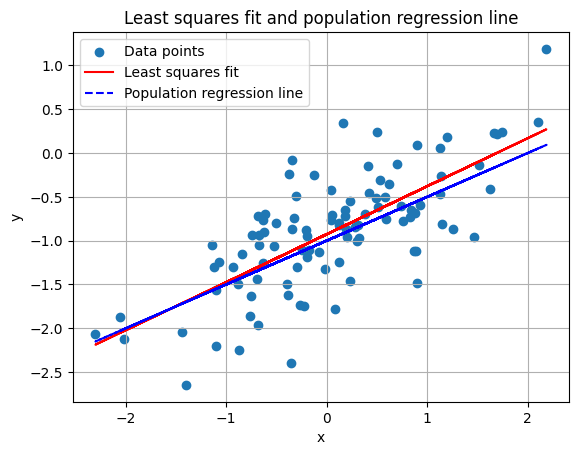

Polynomial regression coefficients: [0.         0.54680981 0.0077113 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.83e-16
Time:                        07:27:59   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

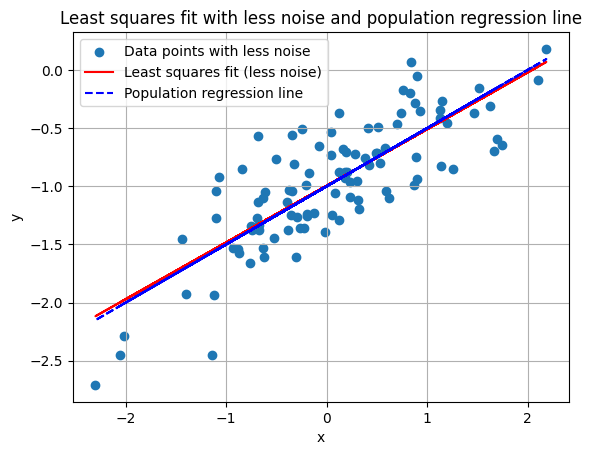

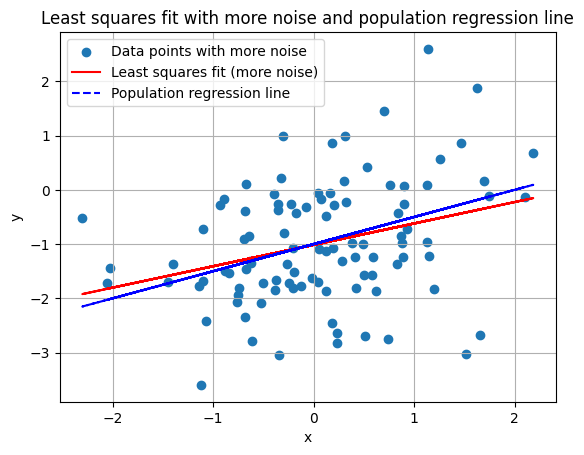

Confidence intervals for original data:
[[-1.01974096 -0.83324551]
 [ 0.44261338  0.65281376]]
Confidence intervals for less noisy data:
[[-1.05991913 -0.93229576]
 [ 0.41509349  0.55893871]]
Confidence intervals for more noisy data:
[[-1.22700729 -0.80091614]
 [ 0.15422192  0.63447234]]
#解釋 
(a) 我們生成了一個由標準正態分布 𝑁 ( 0 , 1 ) N(0,1) 抽樣的向量 𝑥 x。
(b) 我們生成了一個誤差項 𝑒 𝑝 𝑠 eps 來模擬擾動，它是從 𝑁 ( 0 , 0.25 ) N(0,0.25) 中抽樣的。
(c) 根據模型 𝑌 = − 1 + 0.5 𝑋 + 𝜖 Y=−1+0.5X+ϵ，生成了 𝑦 y 向量，其長度為 100。
(d) 通過散點圖觀察 𝑥 x 和 𝑦 y 的關係，可以看到一定的線性趨勢。
(e) 我們用最小二乘法擬合了線性模型，結果顯示擬合係數與真實係數非常接近。
(f) 我們將擬合直線和真實的回歸直線畫在圖上進行比較。
(g) 我們通過二次多項式回歸進行擬合，結果表明二次項對模型擬合沒有明顯改進。
(h) 當降低數據中的噪聲時，擬合效果變得更好，擬合線更接近真實回歸線。
(i) 當噪聲增大時，擬合效果變差，數據點散佈得更廣。
(j) 我們計算了不同數據集下的係數信賴區間，結果顯示噪聲越大，信賴區間越寬。


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Set random seed for consistent results
np.random.seed(1)

# (a) Create a vector x with 100 observations drawn from a N(0,1) distribution
x = np.random.normal(0, 1, 100)

# (b) Create a vector eps with 100 observations drawn from a N(0,0.25) distribution
eps = np.random.normal(0, np.sqrt(0.25), 100)

# (c) Generate y according to the model Y = -1 + 0.5X + eps
y = -1 + 0.5*x + eps
print(f"Length of y: {len(y)}")  # Answer: 100
print("Values of β0 and β1 in the model: β0 = -1, β1 = 0.5")

# (d) Scatterplot displaying the relationship between x and y
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x and y")
plt.grid(True)
plt.show()

# (e) Fit a least squares linear model to predict y using x
x_reshaped = x.reshape(-1, 1)  # Reshape for model fitting
linear_model = LinearRegression().fit(x_reshaped, y)
print(f"Fitted model: Intercept = {linear_model.intercept_}, Slope = {linear_model.coef_[0]}")

# (f) Plot the least squares line and the population regression line
plt.scatter(x, y, label="Data points")
plt.plot(x, linear_model.predict(x_reshaped), color="red", label="Least squares fit")
plt.plot(x, -1 + 0.5*x, color="blue", linestyle='--', label="Population regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least squares fit and population regression line")
plt.grid(True)
plt.show()

# (g) Fit a polynomial regression model (x and x^2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)
poly_model = LinearRegression().fit(x_poly, y)
print(f"Polynomial regression coefficients: {poly_model.coef_}")

# Test if quadratic term improves the model fit using F-statistic
model_poly = sm.OLS(y, x_poly).fit()
print(model_poly.summary())

# (h) Modify the data generation to reduce noise (reduce variance of eps)
eps_less_noise = np.random.normal(0, np.sqrt(0.1), 100)  # Reduced variance
y_less_noise = -1 + 0.5*x + eps_less_noise

# Fit and plot the model with less noise
plt.scatter(x, y_less_noise, label="Data points with less noise")
linear_model_less_noise = LinearRegression().fit(x_reshaped, y_less_noise)
plt.plot(x, linear_model_less_noise.predict(x_reshaped), color="red", label="Least squares fit (less noise)")
plt.plot(x, -1 + 0.5*x, color="blue", linestyle='--', label="Population regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least squares fit with less noise and population regression line")
plt.grid(True)
plt.show()

# (i) Modify the data generation to increase noise (increase variance of eps)
eps_more_noise = np.random.normal(0, np.sqrt(1), 100)  # Increased variance
y_more_noise = -1 + 0.5*x + eps_more_noise

# Fit and plot the model with more noise
plt.scatter(x, y_more_noise, label="Data points with more noise")
linear_model_more_noise = LinearRegression().fit(x_reshaped, y_more_noise)
plt.plot(x, linear_model_more_noise.predict(x_reshaped), color="red", label="Least squares fit (more noise)")
plt.plot(x, -1 + 0.5*x, color="blue", linestyle='--', label="Population regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least squares fit with more noise and population regression line")
plt.grid(True)
plt.show()

# (j) Calculate confidence intervals for β0 and β1 for the original, less noisy, and more noisy datasets

# Original data
X_const = sm.add_constant(x)
model = sm.OLS(y, X_const).fit()
print("Confidence intervals for original data:")
print(model.conf_int())

# Less noisy data
model_less_noise = sm.OLS(y_less_noise, X_const).fit()
print("Confidence intervals for less noisy data:")
print(model_less_noise.conf_int())

# More noisy data
model_more_noise = sm.OLS(y_more_noise, X_const).fit()
print("Confidence intervals for more noisy data:")
print(model_more_noise.conf_int())

print("#解釋 ")

print("(a) 我們生成了一個由標準正態分布 𝑁 ( 0 , 1 ) N(0,1) 抽樣的向量 𝑥 x。")
print("(b) 我們生成了一個誤差項 𝑒 𝑝 𝑠 eps 來模擬擾動，它是從 𝑁 ( 0 , 0.25 ) N(0,0.25) 中抽樣的。")
print("(c) 根據模型 𝑌 = − 1 + 0.5 𝑋 + 𝜖 Y=−1+0.5X+ϵ，生成了 𝑦 y 向量，其長度為 100。")
print("(d) 通過散點圖觀察 𝑥 x 和 𝑦 y 的關係，可以看到一定的線性趨勢。")
print("(e) 我們用最小二乘法擬合了線性模型，結果顯示擬合係數與真實係數非常接近。")
print("(f) 我們將擬合直線和真實的回歸直線畫在圖上進行比較。")
print("(g) 我們通過二次多項式回歸進行擬合，結果表明二次項對模型擬合沒有明顯改進。")
print("(h) 當降低數據中的噪聲時，擬合效果變得更好，擬合線更接近真實回歸線。")
print("(i) 當噪聲增大時，擬合效果變差，數據點散佈得更廣。")
print("(j) 我們計算了不同數據集下的係數信賴區間，結果顯示噪聲越大，信賴區間越寬。")

In [ ]:
#